#### Expected Outcome:
- Know how many product sold every month.
- Know how much customer spend their money every month.
- Customer segmentation analysis.
- Recommendation based on customer segmentation.

#### This project will follow CRISP-DM process.

In [1]:
# Let's get the data. 
# source: https://archive.ics.uci.edu/ml/datasets/Online+Retail
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_v1 = pd.read_excel('retail_data.xlsx')

In [3]:
data_v1.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [6]:
data_v1.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

#### First task is to create a data quality report of the available data.

- InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation. 
- StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product. 
- Description: Product (item) name. Nominal. 
- Quantity: The quantities of each product (item) per transaction. Numeric. 
- InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated. 
- UnitPrice: Unit price. Numeric, Product price per unit in sterling. 
- CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer. 
- Country: Country name. Nominal, the name of the country where each customer resides.

In [52]:
categorical_f = ['InvoiceNo', 'StockCode', 'Description', 'CustomerID', 'Country']
numerical_f = ['Quantity', 'UnitPrice']
#We will deal with InvoiceDate seperately

As we can see there are total 5 nominal variables and 3 numeric variables. We will create a seperate data quality report for both.

In [53]:
## For numeric variables

In [54]:
data_v1.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [55]:
dqt_num = data_v1.describe().transpose()

In [56]:
dqt_num

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


In [57]:
dqt_num.reset_index(inplace=True)

In [58]:
dqt_num.rename({'index': 'Feature'}, axis=1, inplace=True)
dqt_num

,Feature,count,mean,std,min,25%,50%,75%,max
0,Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
1,UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
2,CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


In [59]:
dqt_num.rename({'25%': 'Q1', '50%':'Median','75%':'Q3'}, inplace=True, axis=1)
dqt_num

,Feature,count,mean,std,min,Q1,Median,Q3,max
0,Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
1,UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
2,CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


In [60]:
numerical_data = data_v1[numerical_f]

In [61]:
missing_percentage = (numerical_data.isnull().sum() / len(numerical_data))*100

In [62]:
join_this = missing_percentage.to_frame()

In [63]:
join_this.reset_index(inplace=True)

In [64]:
join_this.rename({'index': 'Feature', 0: 'Missing %'}, inplace=True, axis=1)

In [65]:
join_this

,Feature,Missing %
0,Quantity,0.0
1,UnitPrice,0.0


In [66]:
dqt_num = pd.merge(dqt_num, join_this, on='Feature')

In [73]:
card_join = numerical_data.nunique().to_frame()

In [75]:
card_join.reset_index(inplace=True)

In [79]:
card_join.drop('level_0', inplace=True, axis=1)

In [81]:
card_join.rename({'index': 'Feature', 0: 'Card.'}, inplace=True, axis=1)

In [84]:
dqt_num = dqt_num.merge(card_join, on='Feature')

In [85]:
dqt_num

,Feature,count,mean,std,min,Q1,Median,Q3,max,Missing %,Card.
0,Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0,0.0,722
1,UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0,0.0,1630


In [317]:
dqt_cat = data_v1[categorical_f].describe(include=['object', 'int64', 'float64']).transpose()

In [318]:
dqt_cat

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
InvoiceNo,541909.0,25900.0,573585.0,1114.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
StockCode,541909,4070,85123A,2313,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CustomerID,406829.0,NaN,NaN,NaN,15287.69057,1713.600303,12346.0,13953.0,15152.0,16791.0,18287.0
Country,541909,38,United Kingdom,495478,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [319]:
dqt_cat.drop(['mean', 'min', 'max', '25%', '50%', '75%','std'], axis=1, inplace=True)

In [320]:
dqt_cat.rename({'unique':'Card.', 'top':'Mode'}, axis=1, inplace=True)

In [321]:
dqt_cat.reset_index(inplace=True)

In [322]:
dqt_cat.rename({'index': 'Feature'}, inplace=True, axis=1)

In [323]:
join_null = ((data_v1[categorical_f].isna().sum() / len(data_v1[categorical_f]))*100).to_frame()

In [324]:
join_null.reset_index(inplace=True)

In [325]:
join_null.rename({'index': 'Feature', 0: 'Missing %'}, inplace=True, axis=1)

In [326]:
dqt_cat=dqt_cat.merge(join_null, on='Feature')

In [327]:
keys = []
values = []
for col in dqt_cat['Feature']:
    lol = dict(data_v1[col].value_counts())
    key, value = list(lol.items())[1]
    keys.append(key)
    values.append(value)

In [328]:
keys

[581219, 22423, 'REGENCY CAKESTAND 3 TIER', 14911.0, 'Germany']

In [329]:
values

[749, 2203, 2200, 5903, 9495]

In [330]:
join_2mode = pd.DataFrame(index = keys, columns = ["Score"], data = values)

In [331]:
join_2mode.reset_index(inplace=True)

In [332]:
join_2mode.rename({'index':'2nd Mode'}, inplace=True, axis=1)

In [333]:
join_2mode['Feature'] = dqt_cat['Feature']

In [334]:
join_2mode.rename({ 'Score':'2nd Mode freqn'}, inplace=True, axis=1)

In [335]:
dqt_cat=dqt_cat.merge(join_2mode, on='Feature')

In [336]:
dqt_cat.at[3, 'Card.'] = data_v1['CustomerID'].nunique()

In [337]:
data_v1['InvoiceNo'].nunique()

25900

In [338]:
data_v1['CustomerID'].value_counts()

17841.0    7983
14911.0    5903
14096.0    5128
12748.0    4642
14606.0    2782
           ... 
14351.0       1
13256.0       1
12943.0       1
17923.0       1
13747.0       1
Name: CustomerID, Length: 4372, dtype: int64

In [339]:
temp = dict(data_v1['CustomerID'].value_counts())
key, value = list(temp.items())[0]

In [340]:
key

17841.0

In [341]:
value

7983

In [342]:
dqt_cat.at[3, 'Mode'] = key
dqt_cat.at[3, 'freq'] = value

In [343]:
dqt_cat

,Feature,count,Card.,Mode,freq,Missing %,2nd Mode,2nd Mode freqn
0,InvoiceNo,541909.0,25900.0,573585.0,1114.0,0.000000,581219,749
1,StockCode,541909,4070,85123A,2313,0.000000,22423,2203
2,Description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369,0.268311,REGENCY CAKESTAND 3 TIER,2200
3,CustomerID,406829.0,4372,17841.0,7983,24.926694,14911.0,5903
4,Country,541909,38,United Kingdom,495478,0.000000,Germany,9495


In [344]:
dqt_cat.columns

Index(['Feature', 'count', 'Card.', 'Mode', 'freq', 'Missing %', '2nd Mode',
       '2nd Mode freqn'],
      dtype='object')

In [345]:
dqt_cat['Mode %'] = (dqt_cat['freq'] / dqt_cat['count']) * 100

In [346]:
dqt_cat

,Feature,count,Card.,Mode,freq,Missing %,2nd Mode,2nd Mode freqn,Mode %
0,InvoiceNo,541909.0,25900.0,573585.0,1114.0,0.000000,581219,749,0.20557
1,StockCode,541909,4070,85123A,2313,0.000000,22423,2203,0.426824
2,Description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369,0.268311,REGENCY CAKESTAND 3 TIER,2200,0.438334
3,CustomerID,406829.0,4372,17841.0,7983,24.926694,14911.0,5903,1.962249
4,Country,541909,38,United Kingdom,495478,0.000000,Germany,9495,91.431956


In [347]:
dqt_cat['2nd Mode %'] = (dqt_cat['2nd Mode freqn']/dqt_cat['count'])*100

In [348]:
dqt_cat

,Feature,count,Card.,Mode,freq,Missing %,2nd Mode,2nd Mode freqn,Mode %,2nd Mode %
0,InvoiceNo,541909.0,25900.0,573585.0,1114.0,0.000000,581219,749,0.20557,0.138215
1,StockCode,541909,4070,85123A,2313,0.000000,22423,2203,0.426824,0.406526
2,Description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369,0.268311,REGENCY CAKESTAND 3 TIER,2200,0.438334,0.407064
3,CustomerID,406829.0,4372,17841.0,7983,24.926694,14911.0,5903,1.962249,1.450978
4,Country,541909,38,United Kingdom,495478,0.000000,Germany,9495,91.431956,1.752139


In [349]:
dqt_num

,Feature,count,mean,std,min,Q1,Median,Q3,max,Missing %,Card.
0,Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0,0.0,722
1,UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0,0.0,1630


Here we have data quality reports of numerical and categorical variables.

- Observation 1: CustomerID has around 25% of missing values. For 0.26% of items 'Description' seems to be missing.
- Observation 2: In Data Quality Report of numerical variables, you can see 'Quantity' has a minimum value of -80995.00 and maximum value of 80995. This must be returned/cancelled orders. Even 'UnitPrice' also has a negative value of -11062.06 which is unusual. This also must be representing cancelled/returned orders.
- Observation 3: As you can see in 'Country' row, 91.43% of the orders have 'United Kingdom' as country.

Step 1 - As we can't fill up 25% missing values of CustomerID we need to remove them.

In [351]:
data_v1 = data_v1[pd.notnull(data_v1['CustomerID'])] #Removed null values from the data.

In [357]:
data_v1['Description'].isnull().sum() 
#As you can see when we removed values having null CustomerID, values with null description also got removed.

0

Step 2 - Keeping values belonging to 'United Kingdom' as 'Country'

In [362]:
data_v1 = data_v1[data_v1['Country'] == 'United Kingdom']

Step 3 - Removing negative values from 'Quantity' and 'UnitPrice'.

In [364]:
data_v1 = data_v1[data_v1['Quantity'] > 0]
data_v1 = data_v1[data_v1['UnitPrice'] > 0]

Now only one column to work with is remaining which is 'InvoiceDate'. It is a column having datetime values. Let us see how we can deal with it.

In [370]:
import datetime as dt

In [371]:
data_v1['InvoiceDate'] = pd.to_datetime(data_v1['InvoiceDate'])

In [373]:
data_v1['InvoiceYearMonth'] = data_v1['InvoiceDate'].map(lambda date: 100*date.year + date.month)

In [375]:
data_v1['Date'] = data_v1['InvoiceDate'].dt.strftime('%Y-%m')

In [377]:
#Let's check the stats of this column.
print(max(data_v1['Date']))
print(min(data_v1['Date']))

2011-12
2010-12


As you can see this data is between the year 2010 and 2011. That is, this data is distributed over a year.

In [378]:
data_v1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354321 entries, 0 to 541893
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   InvoiceNo         354321 non-null  object        
 1   StockCode         354321 non-null  object        
 2   Description       354321 non-null  object        
 3   Quantity          354321 non-null  int64         
 4   InvoiceDate       354321 non-null  datetime64[ns]
 5   UnitPrice         354321 non-null  float64       
 6   CustomerID        354321 non-null  float64       
 7   Country           354321 non-null  object        
 8   InvoiceYearMonth  354321 non-null  int64         
 9   Date              354321 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 37.8+ MB


### Performing EDA

Let us analyze CustomerID first.

In [379]:
data_v2 = data_v1

In [383]:
print("Number of unique customers: {}".format(data_v2['CustomerID'].nunique()))
print("Total number of entries: {}".format(len(data_v2['CustomerID'])))

Number of unique customers: 3920
Total number of entries: 354321


- Observation: As you can see the number of entries are far greater than number of unique customers. According to our data quality report, CustomerID = 17841, has most number of orders.

Let's see the trend of customers spending their money over a period of a year.

In [389]:
#First we will have to calculate total spending of customers.
#For that let's multiply Quantity by UnitPrice for every customer.
data_v2['AmountSpent'] = data_v2['Quantity']*data_v2['UnitPrice']

In [391]:
amount_date = data_v2.groupby(['Date'])['AmountSpent'].sum().to_frame()

In [393]:
amount_date.reset_index(inplace=True)

[Text(0.5, 0, 'Months'), Text(0, 0.5, 'Amount spent (normalized)')]

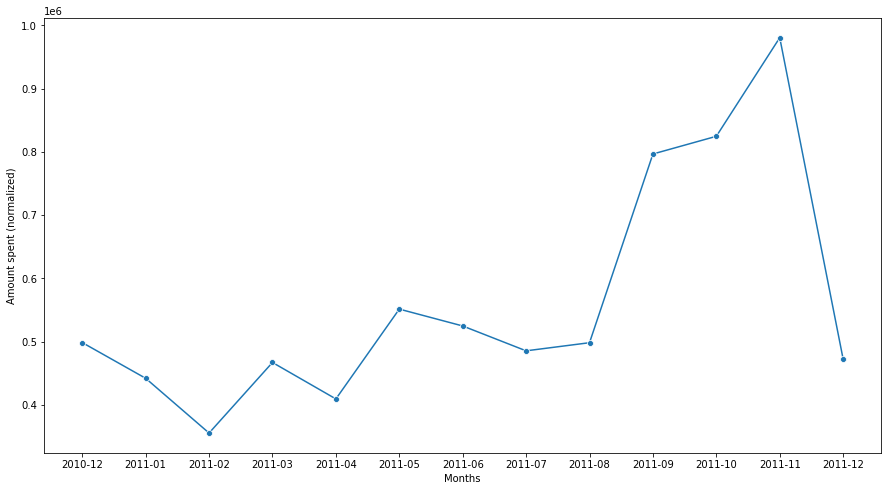

In [403]:
#Let's plot total amount spent vs months
plt.figure(figsize=[15,8])
ax1 = sns.lineplot(x=amount_date['Date'], y=amount_date['AmountSpent'], marker = 'o')
ax1.set(xlabel='Months', ylabel='Amount spent (normalized)')

In [411]:
len(data_v2[data_v2['StockCode'] == '85123A']['Description'])

1947

In [414]:
quantity_date = data_v2.groupby(['Date'])['Quantity'].sum().to_frame()

In [416]:
quantity_date.reset_index()

,Date,Quantity
0,2010-12,267767
1,2011-01,278251
2,2011-02,213375
3,2011-03,276304
4,2011-04,260448
5,2011-05,301824
6,2011-06,280974
7,2011-07,303601
8,2011-08,310831
9,2011-09,454559


[Text(0.5, 0, 'Months'), Text(0, 0.5, 'Products Sold')]

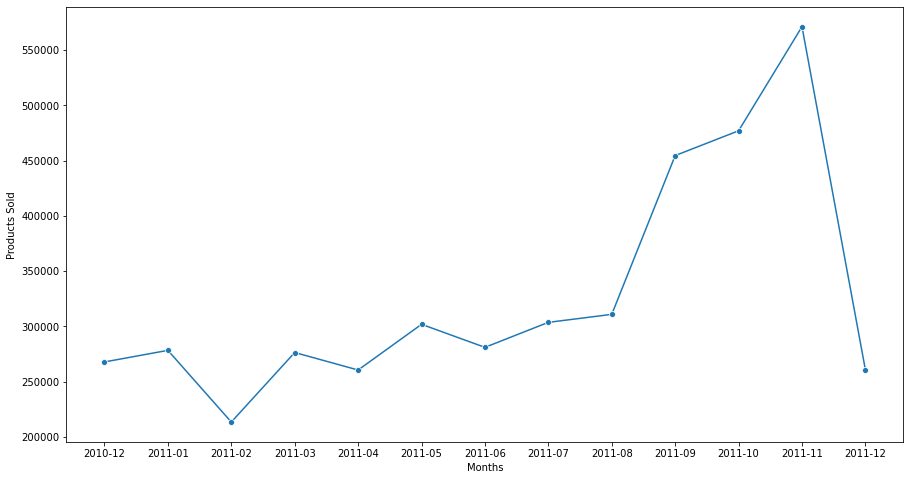

In [418]:
plt.figure(figsize=[15,8])
ax2 = sns.lineplot(data=quantity_date, x='Date', y='Quantity', marker='o')
ax2.set(xlabel='Months', ylabel='Products Sold')

### RFM Analysis:

What Is Recency, Frequency, Monetary Value (RFM)?
Recency, frequency, monetary value is a marketing analysis tool used to identify a company's or an organization's best customers by measuring and analyzing spending habits.

An RFM analysis evaluates clients and customers by scoring them in three categories: how recently they've made a purchase, how often they buy, and the size of their purchases.

The RFM model is based on three quantitative factors :-

1. Recency: How recently a customer has made a purchase.
2. Frequency: How often a customer makes a purchase.
3. Monetary Value: How much money a customer spends on purchases.

(source: https://www.investopedia.com/terms/r/rfm-recency-frequency-monetary-value.asp)

In [423]:
#Keeping dates only.
data_v2['Date'] = pd.DatetimeIndex(data_v2['InvoiceDate']).date

In [438]:
data_recency = data_v2.groupby(['CustomerID'], as_index=False)['Date'].max() 

In [439]:
data_recency

,CustomerID,Date
0,12346.0,2011-01-18
1,12747.0,2011-12-07
2,12748.0,2011-12-09
3,12749.0,2011-12-06
4,12820.0,2011-12-06
...,...,...
3915,18280.0,2011-03-07
3916,18281.0,2011-06-12
3917,18282.0,2011-12-02
3918,18283.0,2011-12-06


In [440]:
max(data_v2['Date'])

datetime.date(2011, 12, 9)

In [450]:
last_date = max(data_v2['Date'])

In [463]:
data_recency['days_since'] = data_recency['Date'].apply(lambda x: (last_date-x).days)

In [467]:
data_recency.drop(['Date'], axis=1, inplace=True)

In [471]:
data_recency

,CustomerID,days_since
0,12346.0,325
1,12747.0,2
2,12748.0,0
3,12749.0,3
4,12820.0,3
...,...,...
3915,18280.0,277
3916,18281.0,180
3917,18282.0,7
3918,18283.0,3


We just calculated recency. Now let's calculate monetary.

In [489]:
#How much money a customer spends on purchases.
data_monetary = data_v2.groupby(['CustomerID'])['AmountSpent'].sum()

In [490]:
data_monetary = data_monetary.to_frame()

In [491]:
freqn = data_v2.groupby(['CustomerID']).count()['InvoiceNo'].to_frame()

In [494]:
data_monetary = data_monetary.merge(freqn, on='CustomerID')

In [498]:
RFM_data = data_monetary.merge(data_recency, on='CustomerID')

In [502]:
RFM_data.rename({'AmountSpent':'Monetary', 'InvoiceNo':'Frequency', 'days_since':'Recency'}, axis=1, inplace=True)

In [505]:
RFM_data = RFM_data[['CustomerID', 'Recency', 'Frequency', 'Monetary' ]]

In [506]:
RFM_data

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12747.0,2,103,4196.01
2,12748.0,0,4595,33719.73
3,12749.0,3,199,4090.88
4,12820.0,3,59,942.34
...,...,...,...,...
3915,18280.0,277,10,180.60
3916,18281.0,180,7,80.82
3917,18282.0,7,12,178.05
3918,18283.0,3,756,2094.88


### Modeling Data

Let's divide the RFM data in quantiles and assign values to the customers between 1 to 4 for all the three sections by comparing values to the quantiles. Here 4 will be the highest and 1 will be the lowest.

In [512]:
quantiles = RFM_data.quantile([0.25,0.50,0.75])

In [513]:
quantiles = quantiles.to_dict()

In [515]:
quantiles.pop('CustomerID')

{0.25: 14208.75, 0.5: 15569.5, 0.75: 16913.25}

In [519]:
quantiles['Recency'][0.25]

17.0

In [522]:
#Let's write functions for calculating RFM scores.

def calcRscore(current, R, quant):
    if quant[R][0.25] >= current:
        return 1
    elif quant[R][0.50] >= current:
        return 2
    elif quant[R][0.75] >= current:
        return 3
    else:
        return 4
    
def calcFMscore(current, FM, quant):
    if quant[FM][0.25] >= current:
        return 4
    elif quant[FM][0.50] >= current:
        return 3
    elif quant[FM][0.75] >= current:
        return 2
    else:
        return 1

In [527]:
custom_segments = RFM_data.copy()

In [535]:
custom_segments['R_score'] = custom_segments['Recency'].apply(calcRscore, args=['Recency', quantiles])
custom_segments['F_score'] = custom_segments['Frequency'].apply(calcFMscore, args=['Frequency', quantiles])
custom_segments['M_score'] = custom_segments['Monetary'].apply(calcFMscore, args=['Monetary', quantiles])

In [536]:
custom_segments

,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score
0,12346.0,325,1,77183.60,4,4,1
1,12747.0,2,103,4196.01,1,1,1
2,12748.0,0,4595,33719.73,1,1,1
3,12749.0,3,199,4090.88,1,1,1
4,12820.0,3,59,942.34,1,2,2
...,...,...,...,...,...,...,...
3915,18280.0,277,10,180.60,4,4,4
3916,18281.0,180,7,80.82,4,4,4
3917,18282.0,7,12,178.05,1,4,4
3918,18283.0,3,756,2094.88,1,1,1


In [537]:
quantiles['Monetary']

{0.25: 300.28000000000003, 0.5: 652.2800000000002, 0.75: 1576.5850000000005}

In [542]:
custom_segments['RFMscore'] = custom_segments['R_score'].astype(str) + custom_segments['F_score'].astype(str) + custom_segments['M_score'].astype(str)

In [548]:
custom_segments.rename({'RFMscore': 'SegmentedScore'}, inplace=True, axis=1)

In [554]:
custom_segments['RFMscore'] = custom_segments[['R_score', 'F_score', 'M_score']].sum(axis=1)

In [556]:
custom_segments.head()

,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score,SegmentedScore,RFMscore
0,12346.0,325,1,77183.60,4,4,1,441,9
1,12747.0,2,103,4196.01,1,1,1,111,3
2,12748.0,0,4595,33719.73,1,1,1,111,3
3,12749.0,3,199,4090.88,1,1,1,111,3
4,12820.0,3,59,942.34,1,2,2,122,5


So now we can say that the customer having RFMscore 111 will be the best customer and evidently customer having RFMscore 444 will be the worst customer. Similarly, we can also say that the customer with RFMscore 113 is someone who is a frequent buyer but does not buy expensive things. Get my point?

In [559]:
custom_segments['Agg. RFM'] = custom_segments[['R_score', 'F_score', 'M_score']].mean(axis=1)

In [560]:
custom_segments

,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score,SegmentedScore,RFMscore,Agg. RFM
0,12346.0,325,1,77183.60,4,4,1,441,9,3.000000
1,12747.0,2,103,4196.01,1,1,1,111,3,1.000000
2,12748.0,0,4595,33719.73,1,1,1,111,3,1.000000
3,12749.0,3,199,4090.88,1,1,1,111,3,1.000000
4,12820.0,3,59,942.34,1,2,2,122,5,1.666667
...,...,...,...,...,...,...,...,...,...,...
3915,18280.0,277,10,180.60,4,4,4,444,12,4.000000
3916,18281.0,180,7,80.82,4,4,4,444,12,4.000000
3917,18282.0,7,12,178.05,1,4,4,144,9,3.000000
3918,18283.0,3,756,2094.88,1,1,1,111,3,1.000000


- Champions are your best customers, who bought most recently, most often, and are heavy spenders. Reward these customers. They can become early adopters for new products and will help promote your brand.
- Potential Loyalists are your recent customers with average frequency and who spent a good amount. Offer membership or loyalty programs or recommend related products to upsell them and help them become your Loyalists or Champions.
- New Customers are your customers who have a high overall RFM score but are not frequent shoppers. Start building relationships with these customers by providing onboarding support and special offers to increase their visits.
- At Risk Customers are your customers who purchased often and spent big amounts, but haven’t purchased recently. Send them personalized reactivation campaigns to reconnect, and offer renewals and helpful products to encourage another purchase.
- Can’t Lose Them are customers who used to visit and purchase quite often, but haven’t been visiting recently. Bring them back with relevant promotions, and run surveys to find out what went wrong and avoid losing them to a competitor.

(source: https://clevertap.com/blog/rfm-analysis/)

Let's calculate the percentage of these customers from our data. 

In [562]:
custom_segments['SegmentedScore'] = custom_segments['SegmentedScore'].astype(str).astype(int)

In [583]:
print("Percentage of 'Champion' in the dataset: {}".format(len(custom_segments[custom_segments['SegmentedScore'] == 111]) / len(custom_segments) *100))
print("Percentage of 'Potential Loyalists' in the dataset: {}".format(len(custom_segments[custom_segments['SegmentedScore'] == 222]) / len(custom_segments) * 100))
print("Percentage of 'New Customers' customers in the dataset: {}".format((len(custom_segments[custom_segments['SegmentedScore'] == 141]) + len(custom_segments[custom_segments['SegmentedScore'] == 131]))/len(custom_segments) * 100))
print("Percentage of 'Risk Customers' customers in the dataset: {}".format((len(custom_segments[custom_segments['SegmentedScore'] == 421])+len(custom_segments[custom_segments['SegmentedScore'] == 411])) / len(custom_segments) * 100))
print("Percentage of 'Can't lose them' customers in the dataset: {}".format((len(custom_segments[custom_segments['SegmentedScore'] == 414]) + len(custom_segments[custom_segments['SegmentedScore'] == 313]))/len(custom_segments) * 100))

Percentage of 'Champion' in the dataset: 10.433673469387756
Percentage of 'Potential Loyalists' in the dataset: 3.9795918367346936
Percentage of 'New Customers' customers in the dataset: 0.5867346938775511
Percentage of 'Risk Customers' customers in the dataset: 0.7142857142857143
Percentage of 'Can't lose them' customers in the dataset: 0.30612244897959184


In [587]:
cst_type = [0] * len(custom_segments)

for i in range(0,len(custom_segments)):

    if custom_segments['SegmentedScore'][i] == 111:
        cst_type[i] = "Champion"
        
    elif custom_segments['SegmentedScore'][i] == 222 :
        cst_type[i] = "Potential Loyalist"
        
    elif custom_segments['SegmentedScore'][i] == 141 or custom_segments['SegmentedScore'][i] == 131:
        cst_type[i] = "New Customers"
    
    elif custom_segments['SegmentedScore'][i] == 411 or custom_segments['SegmentedScore'][i] == 421:
        cst_type[i] = "Risk Customers"
    
    elif custom_segments['SegmentedScore'][i] == 414 or custom_segments['SegmentedScore'][i] == 313:
        cst_type[i] = "Can't lose them"

    elif custom_segments['F_score'][i] == 1:
        cst_type[i] = "Loyal Customers"  
    
    elif custom_segments['M_score'][i] == 1:
        cst_type[i] = "Big Spenders"   
        
    else:
        cst_type[i] = "Others"

In [589]:
custom_segments['CustomerType'] = cst_type

In [590]:
custom_segments

,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score,SegmentedScore,RFMscore,Agg. RFM,CustomerType
0,12346.0,325,1,77183.60,4,4,1,441,9,3.000000,Big Spenders
1,12747.0,2,103,4196.01,1,1,1,111,3,1.000000,Champion
2,12748.0,0,4595,33719.73,1,1,1,111,3,1.000000,Champion
3,12749.0,3,199,4090.88,1,1,1,111,3,1.000000,Champion
4,12820.0,3,59,942.34,1,2,2,122,5,1.666667,Others
...,...,...,...,...,...,...,...,...,...,...,...
3915,18280.0,277,10,180.60,4,4,4,444,12,4.000000,Others
3916,18281.0,180,7,80.82,4,4,4,444,12,4.000000,Others
3917,18282.0,7,12,178.05,1,4,4,144,9,3.000000,Others
3918,18283.0,3,756,2094.88,1,1,1,111,3,1.000000,Champion


- Example use case of this analysis:
By this analysis we can answer many questions about our products and target customers.
For example: Which products are popular between the frequent buyers?

In [596]:
#Let's answer the above question

champion_customers = custom_segments[custom_segments['CustomerType'] == 'Champion']
champs = list(champion_customers['CustomerID'])
champs_data = data_v2[data_v2['CustomerID'].isin(champs)]

In [601]:
champs_data['Description'].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER    755
JUMBO BAG RED RETROSPOT               743
LUNCH BAG RED RETROSPOT               605
LUNCH BAG  BLACK SKULL.               527
PARTY BUNTING                         510
                                     ... 
PINK CHERRY BLOSSOM CUP & SAUCER        1
VINTAGE NOTEBOOK BEAUTY GIRL            1
MULTICOLOUR EASTER RABBIT               1
WRAP GREEN RUSSIAN FOLKART              1
GIRLY PINK TOOL SET                     1
Name: Description, Length: 3563, dtype: int64

As you can see thus we can answer many questions related to customers and the products.

In [623]:
#Let's visualize
labelled_data = custom_segments.groupby('CustomerType')['CustomerID'].count().sort_values(ascending=False).reset_index()
labelled_data.drop([0], inplace=True)

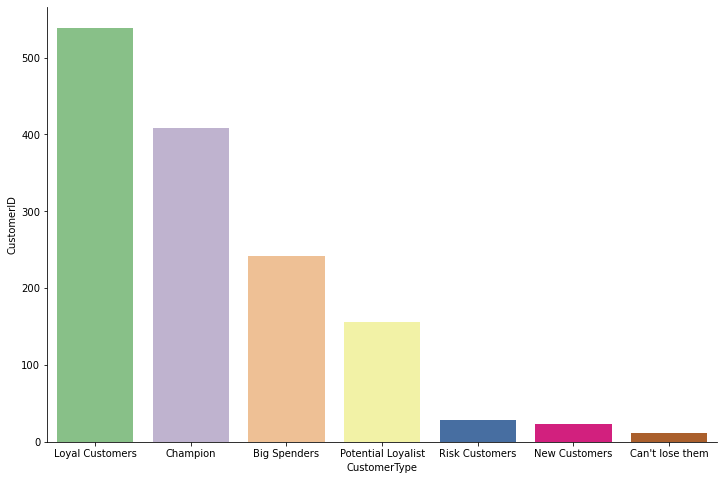

In [628]:
plt.figure(figsize=[12,8])
sns.barplot(data=labelled_data, x = 'CustomerType', y = 'CustomerID', palette='Accent')
sns.despine()

In [607]:
custom_segments['CustomerType'].value_counts()

Others                2511
Loyal Customers        539
Champion               409
Big Spenders           242
Potential Loyalist     156
Risk Customers          28
New Customers           23
Can't lose them         12
Name: CustomerType, dtype: int64

### K-Means Clustering:

In [629]:
RFM_model = custom_segments[['Recency', 'Frequency', 'Monetary']]

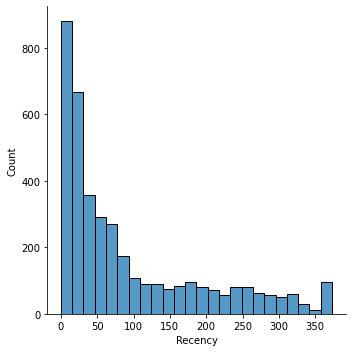

In [632]:
sns.displot(RFM_model['Recency'])

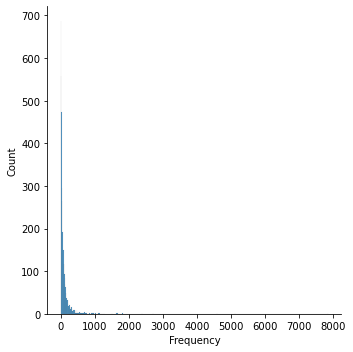

In [633]:
sns.displot(RFM_model['Frequency'])

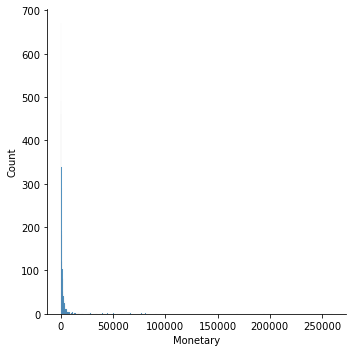

In [637]:
sns.displot(RFM_model['Monetary'])

We know that K-means clustering algorithm is sensitive to outliers. As we can see from the histograms, there are outliers present in our data.

- How to calculate outliers?

One way of identifying outliers is to compare the gaps between the median, minimum, maximum, 1st quartile, and 3rd quartile values. If the gap between the 3rd quartile and the maximum value is noticeably larger than the gap between the median and the 3rd quartile, this suggests that the maximum value is unusual and is likely to be an outlier. Similarly, if the gap between the 1st quartile and the minimum value is noticeably larger than the gap between the median and the 1st quartile, this suggests that the minimum value is unusual and is likely to be an outlier.

In [639]:
#let's calculate median, minimum, maximum, 1st Q, 3rd Q values for our data.

dqt_rfm = RFM_model.describe().transpose()

In [641]:
dqt_rfm.rename({'25%': 'Q1', '50%':'Median','75%':'Q3'}, axis=1, inplace=True)

In [642]:
dqt_rfm

,count,mean,std,min,Q1,Median,Q3,max
Recency,3920.0,91.742092,99.533485,0.00,17.00,50.00,142.000,373.0
Frequency,3920.0,90.388010,217.808385,1.00,17.00,41.00,99.250,7847.0
Monetary,3920.0,1864.385601,7482.817477,3.75,300.28,652.28,1576.585,259657.3


In [645]:
max_outlier_range = dqt_rfm['Q3'] + 1.5*(dqt_rfm['Q3'] - dqt_rfm['Q1'])
min_outlier_range = dqt_rfm['Q1'] - 1.5*(dqt_rfm['Q3'] - dqt_rfm['Q1'])
upper_threshold = dict(max_outlier_range)
lower_threshold = dict(min_outlier_range)

In [647]:
print(upper_threshold)
print(lower_threshold)

{'Recency': 329.5, 'Frequency': 222.625, 'Monetary': 3491.0425000000014}
{'Recency': -170.5, 'Frequency': -106.375, 'Monetary': -1614.177500000001}


In [649]:
upper_threshold['Recency']

329.5

You can see the max and min values from the dqt_rfm dataframe and see that outliers are present in the dataset when you comapre them to upper and lower threshold. To deal with these outliers we can use clamp transforamtion. In this we convert the values which are lower than the lower threshold to lower threshold and values which are greater than the upper threshold to upper threshold.

In [648]:
RFM_model_v1 = RFM_model.copy()

In [654]:
def clamp(x, upper, lower):
    if x < lower:
        return lower
    elif x > upper:
        return upper
    else:
        return x

In [659]:
RFM_model_v1['Recency'] = RFM_model_v1['Recency'].apply(clamp, args=[upper_threshold['Recency'], lower_threshold['Recency']])
RFM_model_v1['Frequency'] = RFM_model_v1['Frequency'].apply(clamp, args=[upper_threshold['Frequency'], lower_threshold['Frequency']])
RFM_model_v1['Monetary'] = RFM_model_v1['Monetary'].apply(clamp, args=[upper_threshold['Monetary'], lower_threshold['Monetary']])

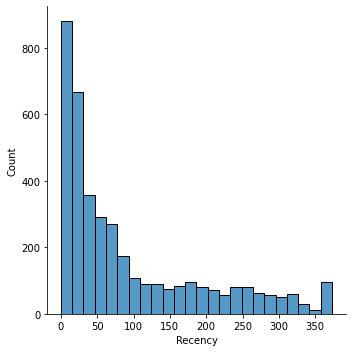

In [666]:
sns.displot(RFM_model_v1['Recency'])

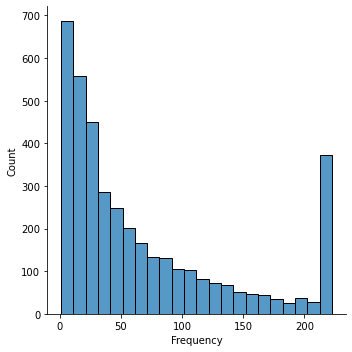

In [676]:
sns.displot(RFM_model_v1['Frequency'])

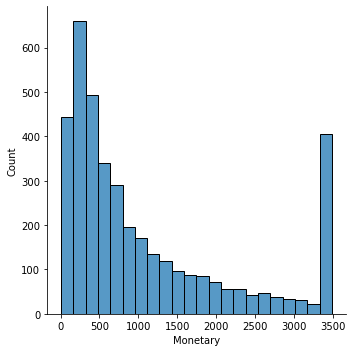

In [677]:
sns.displot(RFM_model_v1['Monetary'])

Now, we have removed outliers. Our data looks skewed as you can see from the visualizations. K-Means does not work well on skewed data. Hence, we are gonna perform log transformation on our data.

In [670]:
RFM_model_v2 = RFM_model_v1.copy()

In [671]:
RFM_model_v2 = np.log(RFM_model_v2 + 1)

In [672]:
RFM_model_v2

,Recency,Frequency,Monetary
0,5.786897,0.693147,8.158242
1,1.098612,4.644391,8.158242
2,0.000000,5.409971,8.158242
3,1.386294,5.298317,8.158242
4,1.386294,4.094345,6.849427
...,...,...,...
3915,5.627621,2.397895,5.201806
3916,5.198497,2.079442,4.404522
3917,2.079442,2.564949,5.187665
3918,1.386294,5.409971,7.647729


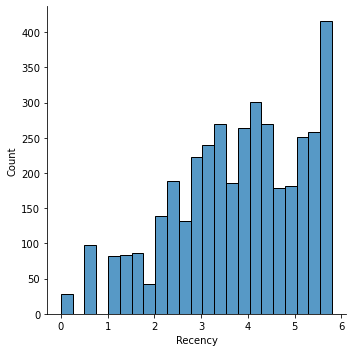

In [675]:
sns.displot(RFM_model_v2['Recency'])

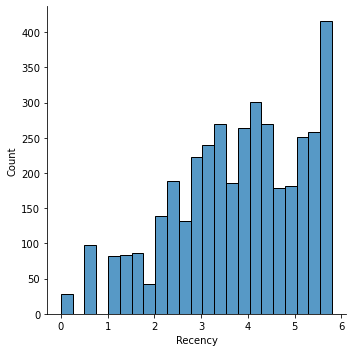

In [678]:
sns.displot(RFM_model_v2['Frequency'])

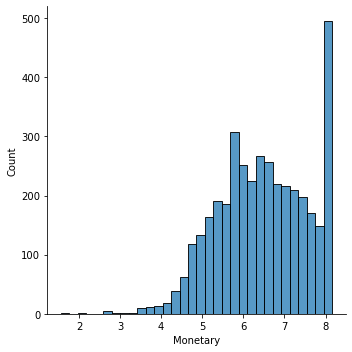

In [680]:
sns.displot(RFM_model_v2['Monetary'])

Standardizing data.

In [682]:
from sklearn.preprocessing import StandardScaler

In [683]:
scaler = StandardScaler()
RFM_stdzed = scaler.fit_transform(RFM_model_v2)

In [685]:
RFM_stdzed = pd.DataFrame(RFM_stdzed, columns=[RFM_model_v2.columns])

In [687]:
RFM_stdzed.head()

,Recency,Frequency,Monetary
0,1.445048,-2.542323,1.525606
1,-1.957577,0.828374,1.525606
2,-2.754919,1.481469,1.525606
3,-1.748786,1.386220,1.525606
4,-1.748786,0.359144,0.337944


<AxesSubplot:ylabel='Count'>

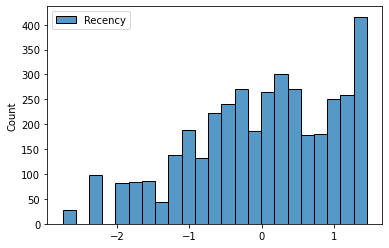

In [694]:
sns.histplot(RFM_stdzed['Recency'])

<AxesSubplot:ylabel='Count'>

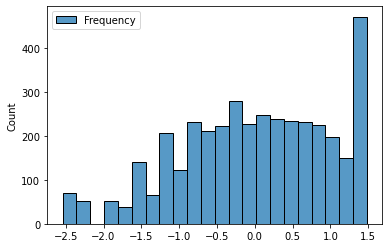

In [695]:
sns.histplot(RFM_stdzed['Frequency'])

<AxesSubplot:ylabel='Count'>

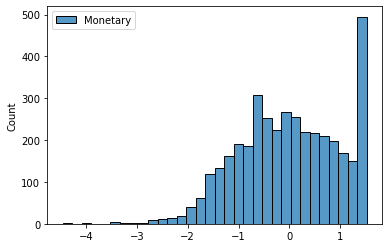

In [696]:
sns.histplot(RFM_stdzed['Monetary'])

In [699]:
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(RFM_stdzed) 
    kmeanModel.fit(RFM_stdzed)     
      
    distortions.append(sum(np.min(cdist(RFM_stdzed, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / RFM_stdzed.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(RFM_stdzed, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / RFM_stdzed.shape[0] 
    mapping2[k] = kmeanModel.inertia_

Text(0.5, 1.0, 'Elbow method')

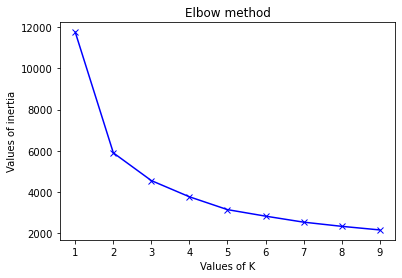

In [700]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Values of inertia')
plt.title('Elbow method')

3 looks like an optimum number of clusters here. 4 also looks like a good choice. To choose between 3 or 4 we can use Silhouetter Score. Higher the better.

In [729]:

from sklearn.metrics import silhouette_score

sil = []
kmax = 9

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(3, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(RFM_stdzed)
  labels = kmeans.labels_
  sil.append(silhouette_score(RFM_stdzed, labels, metric = 'euclidean'))

In [730]:
labels

array([1, 2, 2, ..., 0, 2, 7], dtype=int32)

Text(0.5, 1.0, 'S-score method')

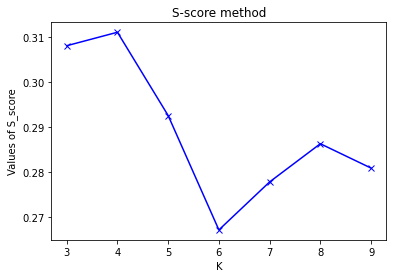

In [732]:
K= range(3, kmax+1)
plt.plot(K, sil, 'bx-')
plt.xlabel('K')
plt.ylabel('Values of S_score')
plt.title('S-score method')

This tells us that 4 is better than 3.

In [709]:
from sklearn.metrics import davies_bouldin_score

In [711]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(RFM_stdzed)

KMeans(n_clusters=3)

In [713]:
kmax = 5
davies = []
for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters=3)
    kmeans.fit(RFM_stdzed)
    labels = kmeans.labels_
    davies.append(davies_bouldin_score(RFM_stdzed, kmeans.labels_))

When K=3: 1.1186926203221892
When K=4: 1.1186926203221892


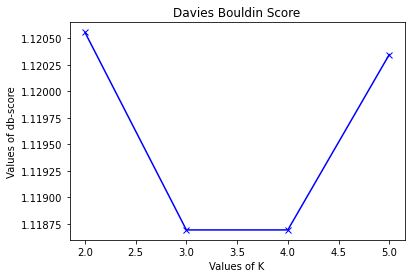

In [716]:
K= range(2, kmax+1)
plt.plot(K, davies, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Values of db-score')
plt.title('Davies Bouldin Score')
print("When K=3: {}".format(davies[1]))
print("When K=4: {}".format(davies[2]))

In [718]:
davies[1]-davies[2]

0.0

Hence, we can use 4 for further processing.

In [735]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(RFM_stdzed)

KMeans(n_clusters=4)

In [738]:
RFM_data

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12747.0,2,103,4196.01
2,12748.0,0,4595,33719.73
3,12749.0,3,199,4090.88
4,12820.0,3,59,942.34
...,...,...,...,...
3915,18280.0,277,10,180.60
3916,18281.0,180,7,80.82
3917,18282.0,7,12,178.05
3918,18283.0,3,756,2094.88


In [739]:
cluster_labels = kmeans.labels_
        
# Create a cluster label column in original dataset
data_k4 = RFM_data.assign(Cluster = cluster_labels)

In [760]:
data_k4.drop(['CustomerID'], axis=1, inplace=True)

In [767]:
data_k4

,Recency,Frequency,Monetary,Cluster
0,325,1,77183.60,1
1,2,103,4196.01,2
2,0,4595,33719.73,2
3,3,199,4090.88,2
4,3,59,942.34,2
...,...,...,...,...
3915,277,10,180.60,1
3916,180,7,80.82,1
3917,7,12,178.05,3
3918,3,756,2094.88,2


In [772]:
final_analysis = data_k4.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'Monetary':['mean','count']
}).round(0)

In [775]:
final_analysis

Recency Frequency Monetary      
           mean      mean     mean count
Cluster                                 
0          99.0      78.0   1322.0  1105
1         194.0      14.0    380.0  1131
2          12.0     244.0   5206.0   944
3          26.0      30.0    681.0   740

In [778]:
final_analysis['Total %'] = final_analysis['Monetary']['count'] / 3920 * 100

In [779]:
final_analysis

Recency Frequency Monetary          Total %
           mean      mean     mean count           
Cluster                                            
0          99.0      78.0   1322.0  1105  28.188776
1         194.0      14.0    380.0  1131  28.852041
2          12.0     244.0   5206.0   944  24.081633
3          26.0      30.0    681.0   740  18.877551

- We can interpret these clusters as follows:

Cluster 2 has the lowest 'Recency' value, highest 'Frequency' value and highest 'Monetary' value. Hence, we can safely say that the Cluster 3 represents 'Champion' customers. (Those who buys frequently, spend good amount and are amoong recent buyers). This comprises around 24% of our data. Reward these customers. They can become early adopters for new products and will help promote your brand.

Cluster 1 has the highest 'Recency' value, lowest 'Frequency' value and lowest 'Monetary' value. Hence, we can safely say that the Cluster 1 represents 'Lost Customers', who were never frequent buyers or big spenders.

Cluster 0 has high 'Recency' value, but it also has high 'Frequency' and 'Monetary' value. Hence, we can say that th Cluster 0 represents 'At Risk' customers. At Risk Customers are your customers who purchased often and spent big amounts, but haven’t purchased recently. Send them personalized reactivation campaigns to reconnect, and offer renewals and helpful products to encourage another purchase.

Cluster 3 has comparitively low overall RFM score but they have bought frequently. They may reprsent 'Almost lost' customers or some of the points may be representing 'New customers' as they have bought products recently.